# Estadísticas de correlación entre teoría de grafos (VG en particular) y Gramians Angular Fields

In [1]:
from utils import white_noise, draw_side_by_side, plot_hist
from GraphConversionLibrary import *
from GAFLibrary import GramianSummationField, GramianDifferenceField
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

/home/cperezln/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
fst_ts = white_noise(100)

In [3]:
gdf = GramianDifferenceField(series = fst_ts)

In [4]:
vg_gdf = nx.Graph(np.array(df_projection(gdf)))

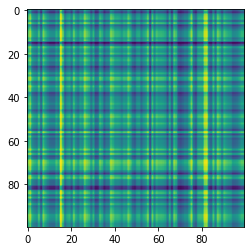

In [5]:
fig, ax = plt.subplots()
ax.imshow(gdf)

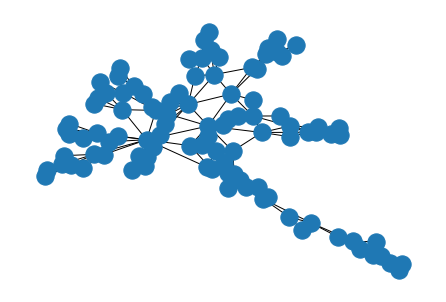

In [6]:
nx.draw(vg_gdf)

In [7]:
horizontal = hvg(fst_ts)[1]

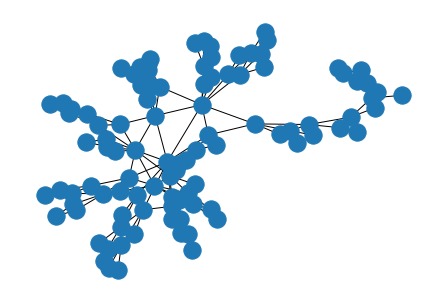

In [8]:
nx.draw(nx.Graph(np.array(horizontal)))

Se ve que efectivamente se comportan de manera semejante. Vamos a hacer un estudio del comportamiento de distribución por grado, longitud de caminos y centralidades en función del ruido, para series temporales periodicas.

In [9]:
n = 30
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 8*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.3 * gaussian_noise

In [10]:
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)

Text(0.5, 1.0, 'Combination')

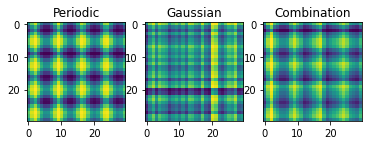

In [11]:
axf = plt.subplot(1, 3, 1)
axf.imshow(gdf1)
axf.set_title("Periodic")
axs = plt.subplot(1, 3, 2)
axs.imshow(gdf2)
axs.set_title("Gaussian")
axs = plt.subplot(1, 3, 3)
axs.imshow(gdf3)
axs.set_title("Combination")

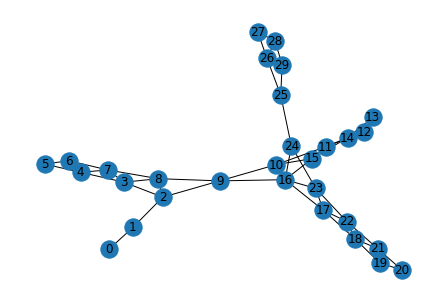

In [12]:
hvg1 = nx.Graph(np.array(hvg(periodic)[1]))
nx.draw(hvg1, with_labels = True)

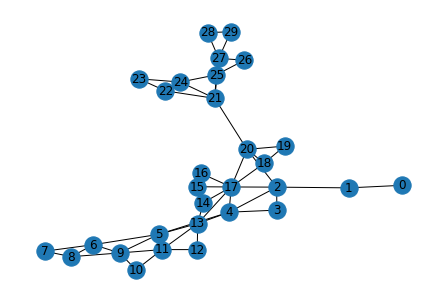

In [13]:
hvg2 = nx.Graph(np.array(hvg(gaussian_noise)[1]))
nx.draw(hvg2, with_labels = True)

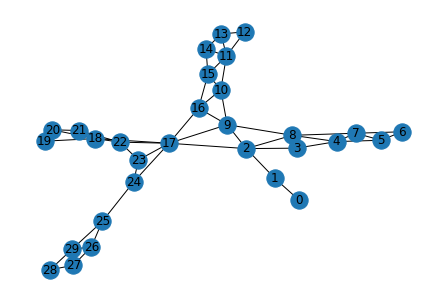

In [14]:
hvg3 = nx.Graph(np.array(hvg(combination)[1]))
nx.draw(hvg3, with_labels = True)

En este notebook vamos a estudiar las posibles propiedades del ruido blanco sobre series periodicas, y cómo extraerlas con grafos

### Distribución por grado del HVG

In [249]:
# Declaración de series
periodic = np.sin(np.linspace(0, 5*np.pi, 100))
random_ls = [np.random.randn(100) for _ in range(500)]
comb_ls = [periodic + random_ls[i]*0.3 for i in range(500)]

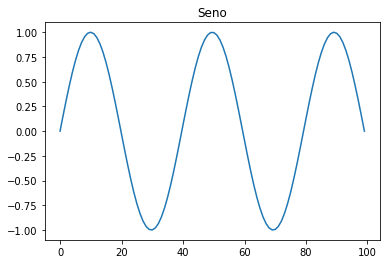

In [250]:
axse = plt.subplot(1, 1, 1)
axse.plot(periodic)
axse.set_title("Seno")
plt.plot()
plt.savefig("seno.jpg")

La distribución por grado del seno es

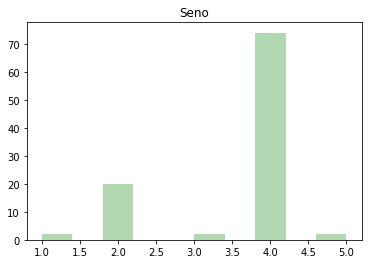

In [251]:
lsSin = [nx.Graph(np.array(hvg(i)[1])) for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
ax = plt.subplot(1, 1, 1)
plt.hist(bins1[:-1], bins1, weights=counts1, alpha=.3, color="green")
ax.set_title("Seno")
plt.savefig("seno_dist.jpg", bbox_inches='tight')

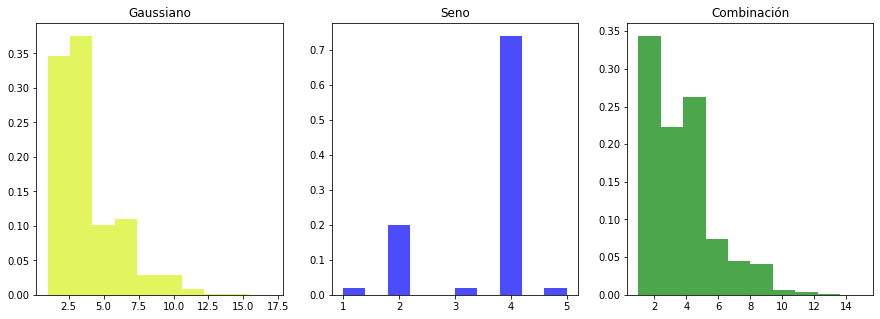

In [252]:
lsSin = [nx.Graph(np.array(hvg(i)[1])) for i in [periodic]]
degreesSin = [[d for n, d in g.degree()] for g in lsSin]
degreesSin = [item for row in degreesSin for item in row]
counts1, bins1 = np.histogram(degreesSin)
lsHG = [nx.Graph(np.array(hvg(i)[1])) for i in random_ls]
degreesHG = [[d for n, d in g.degree()] for g in lsHG]
degreesHG = [item for row in degreesHG for item in row]
counts2, bins2 = np.histogram(degreesHG)
lsHG1 = [nx.Graph(np.array(hvg(i)[1])) for i in comb_ls]
degreesHG1 = [[d for n, d in g.degree()] for g in lsHG1]
degreesHG1 = [item for row in degreesHG1 for item in row]
counts3, bins3 = np.histogram(degreesHG1)
f, (axh1, axh2, axh3) = plt.subplots(1, 3)
f.set_figheight(5)
f.set_figwidth(15)
axh1.hist(bins2[:-1], bins2, weights=(1/sum(counts2))*np.array(counts2), alpha=.7, color="#d7f01a")
axh1.set_title("Gaussiano")
axh2.hist(bins1[:-1], bins1, weights=(1/sum(counts1))*np.array(counts1), alpha=.7, color="blue")
axh2.set_title("Seno")
axh3.hist(bins3[:-1], bins3, weights=(1/sum(counts3))*np.array(counts3), alpha=.7, color="green")
axh3.set_title("Combinación")
plt.savefig("distb.jpg", bbox_inches='tight')

Es evidente que el ruido aumenta los grados enormemente. Aún así, la serie periódica mantiene los grados alrededor de 3/4 en la combinación.

Vamos a estudiar ahora la propiedad el mundo pequeño

In [30]:
def average_path_lenght(g):
    res = nx.floyd_warshall(g)
    fact = len(g)*(len(g)-1)
    return sum((1/fact)*np.array([res[i][j] for i in res for j in res[i]]))

In [35]:
swps = [average_path_lenght(nx.Graph(np.array(hvg(np.sin(np.linspace(0, 5*np.pi, i)))[1]))) for i in range(30, 500)]

In [43]:
swpr =  [average_path_lenght(nx.Graph(np.array(hvg(np.random.randn(i))[1]))) for i in range(30, 500)]

In [37]:
swpc = [average_path_lenght(nx.Graph(np.array(hvg(np.random.randn(i) + np.sin(np.linspace(0, 5*np.pi, i)))[1]))) for i in range(30, 500)]


In [254]:
swpc2 = [average_path_lenght(nx.Graph(np.array(hvg(0.3*np.random.randn(i) + np.sin(np.linspace(0, 5*np.pi, i)))[1]))) for i in range(30, 500)]


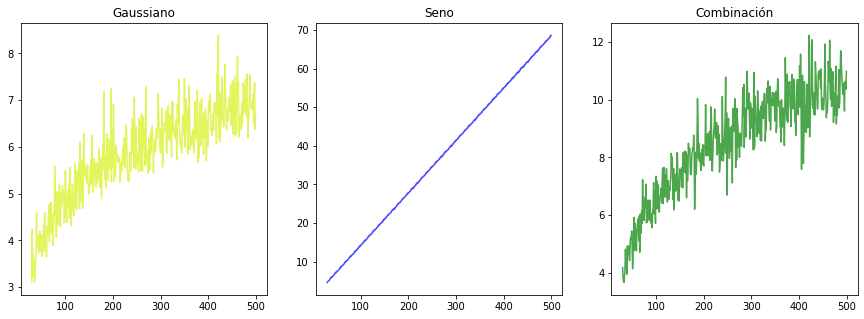

In [255]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figheight(5)
f.set_figwidth(15)
ax1.plot(range(30, 500), swpr, alpha=.7, color="#d7f01a")
ax1.set_title("Gaussiano")
ax2.plot(range(30, 500), swps, alpha=.7, color="blue")
ax2.set_title("Seno")
ax3.plot(range(30, 500), swpc2, alpha=.7, color="green")
ax3.set_title("Combinación")

plt.savefig("lengh_path.jpg", bbox_inches='tight')

In [256]:
import pickle

with open("ruido", "wb") as f:
    pickle.dump(swpr, f) # converts array to binary and writes to output
with open("seno", "wb") as f:
    pickle.dump(swps, f) # converts array to binary and writes to output
with open("combi", "wb") as f:
    pickle.dump(swpc, f) # converts array to binary and writes to output
with open("combi03", "wb") as f:
    pickle.dump(swpc2, f)

Centralidad y GAF

Imagen presentación

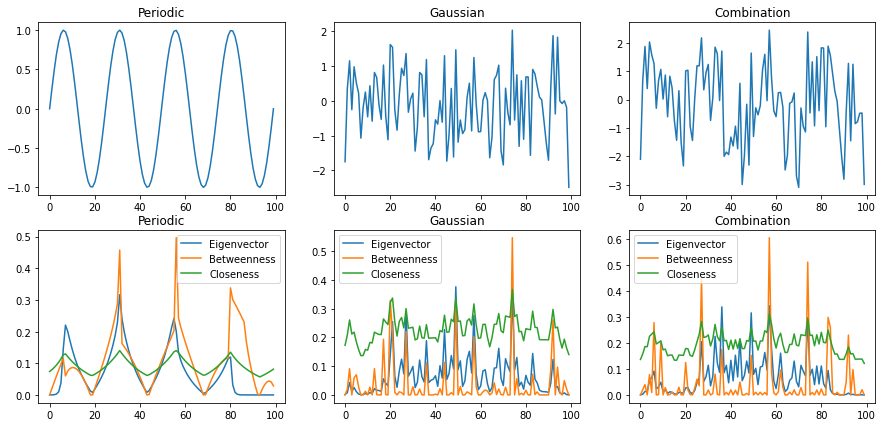

In [227]:

combination = periodic + 1.2 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (ax1, ax2, ax3)) = plt.subplots(2, 3)
f.set_figheight(7)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()

plt.savefig("degree12.jpg", bbox_inches='tight')

Exploración con un 0.3 de ruido en la combinación de las centralidades

Text(0.5, 1.0, 'Combination')

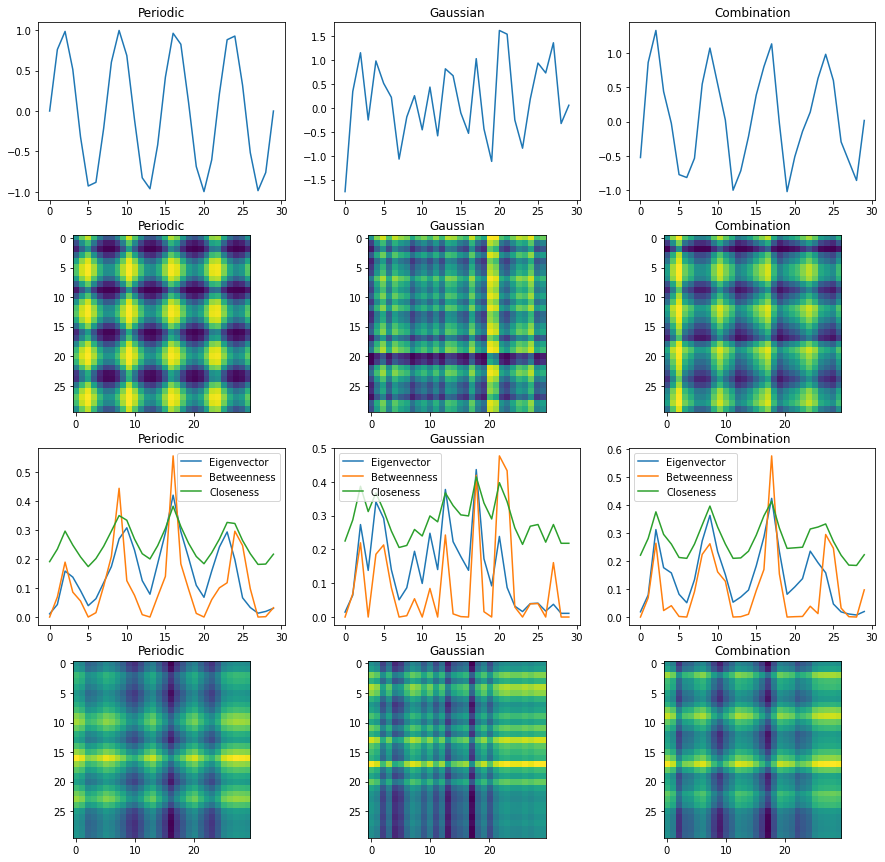

In [151]:
# Param declaration
n = 30
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 8*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.3 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1)
eigc2 = nx.eigenvector_centrality(hvg2)
eigc3 = nx.eigenvector_centrality(hvg3)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")


def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")

Text(0.5, 1.0, 'Combination')

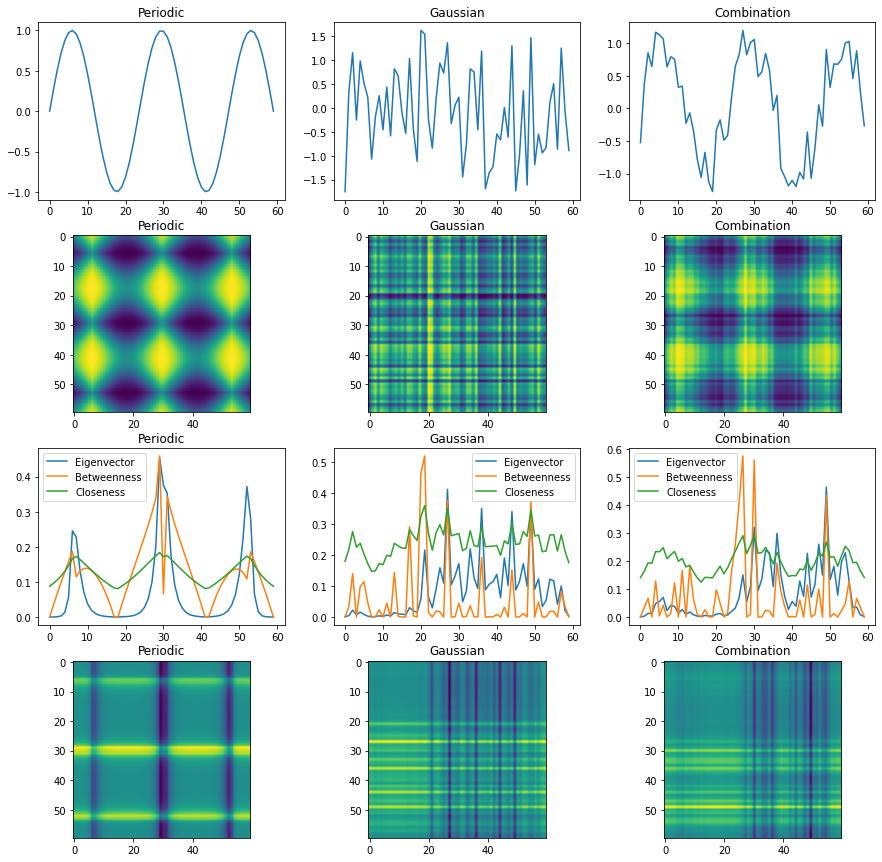

In [152]:
# Param declaration
n = 60
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 5*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.3 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")


def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")

Text(0.5, 1.0, 'Combination')

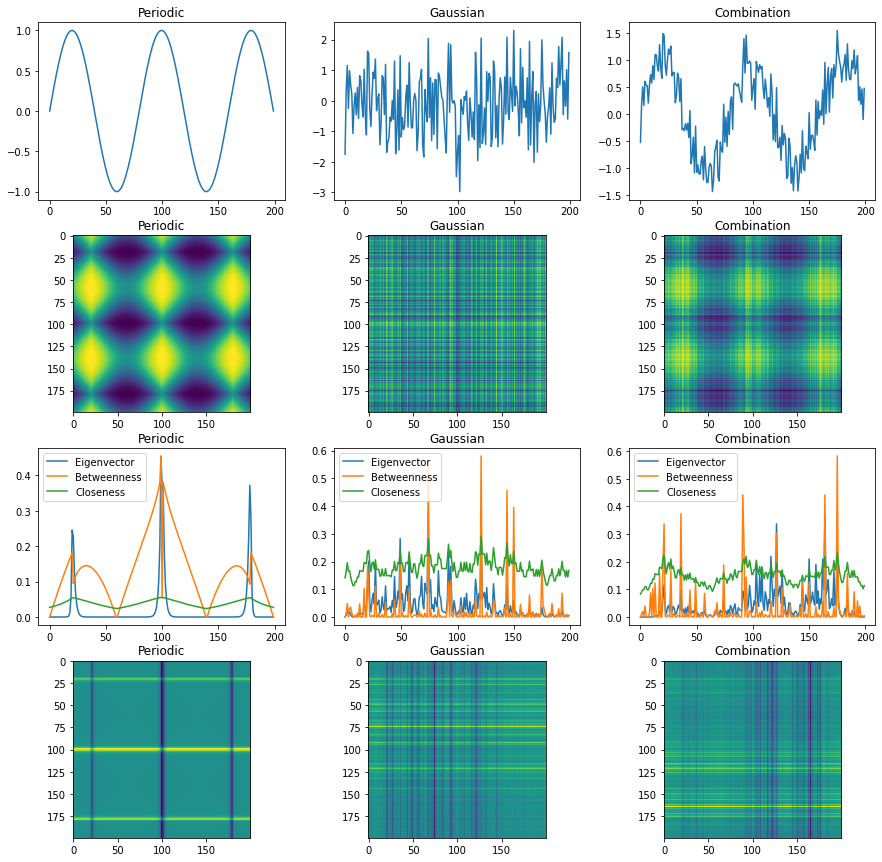

In [153]:
# Param declaration
n = 200
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 5*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.3 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")


def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")

Exploración con un 0.5 de ruido en la combinación de las centralidades

Text(0.5, 1.0, 'Combination')

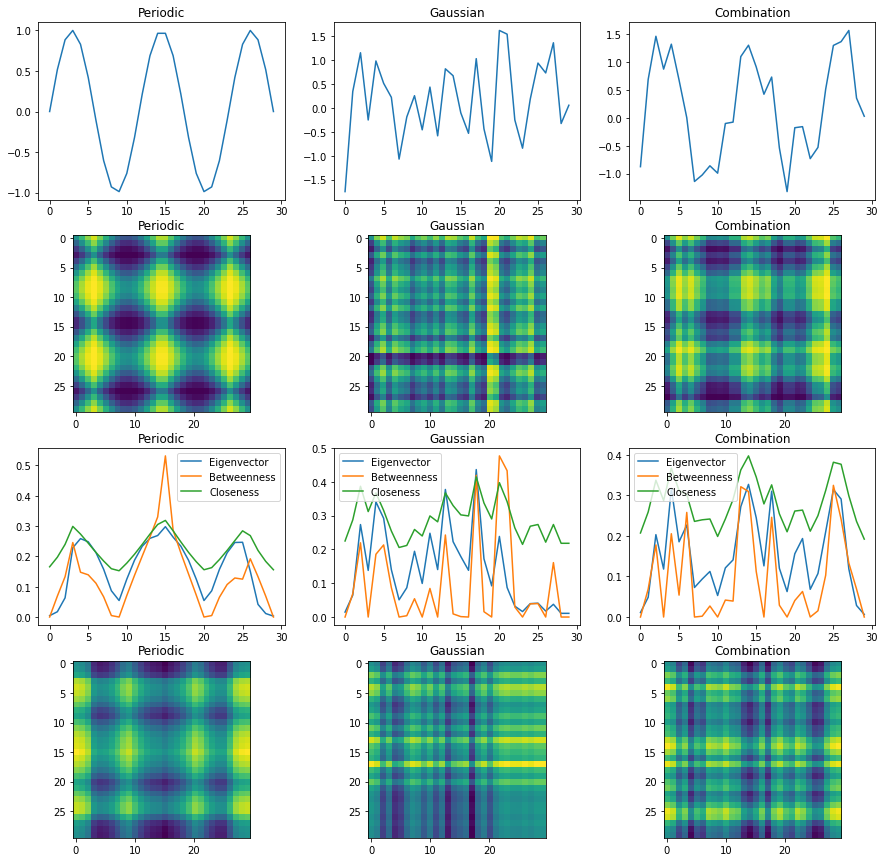

In [147]:
# Param declaration
n = 30
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 5*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.5 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")


def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")

Text(0.5, 1.0, 'Combination')

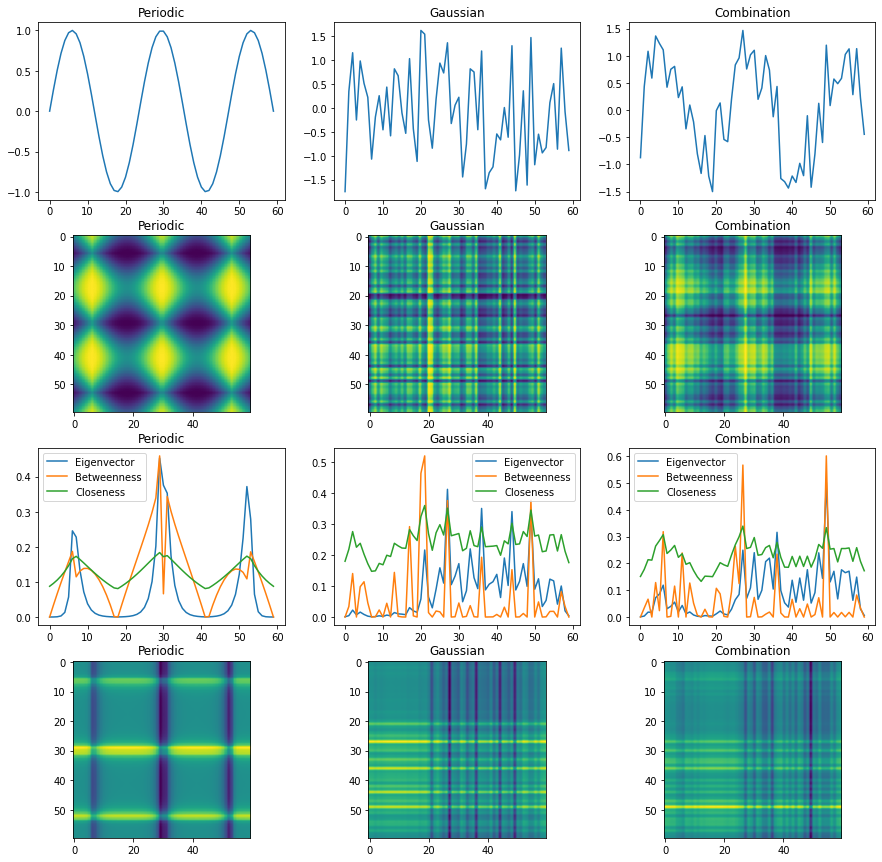

In [148]:
# Param declaration
n = 60
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 5*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.5 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")


def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")

Text(0.5, 1.0, 'Combination')

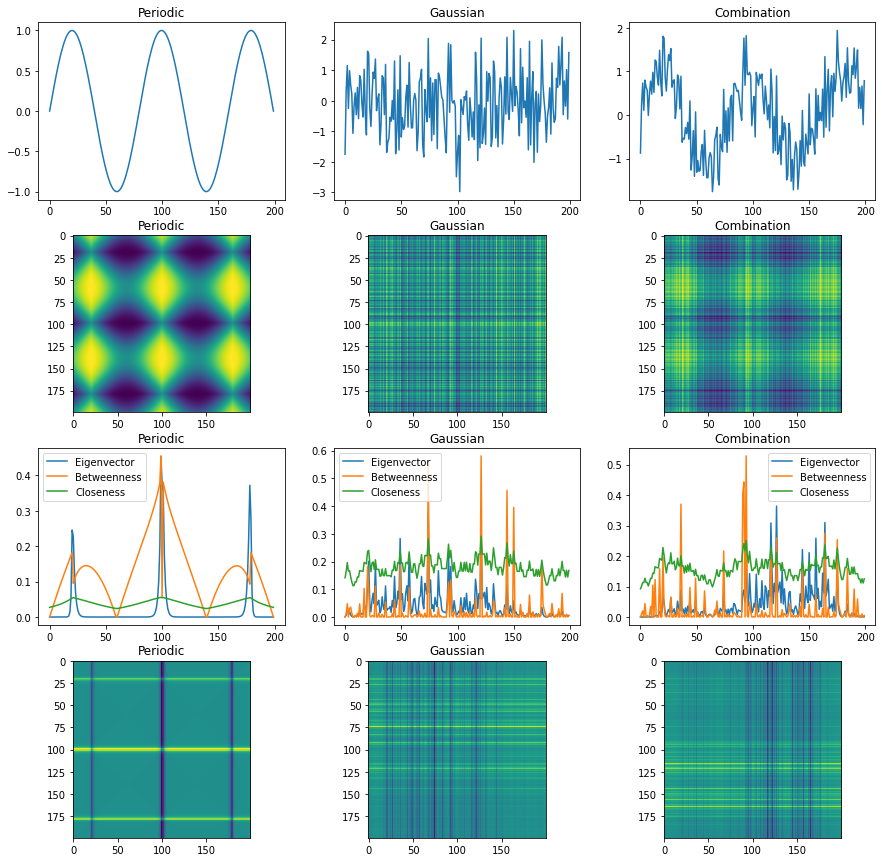

In [150]:
# Param declaration
n = 200
seed = 100
timesteps = list(range(n))
periodic = np.sin(np.linspace(0, 5*np.pi, n))
np.random.seed(seed=seed)
gaussian_noise = np.random.randn(n)
combination = periodic + 0.5 * gaussian_noise
# Gramian Computation
gdf1 = GramianDifferenceField(series = periodic)
gdf2 = GramianDifferenceField(series = gaussian_noise)
gdf3 = GramianDifferenceField(series = combination)
# Graph Declaration
hvg1 = nx.Graph(np.array(df_projection(gdf1)))
hvg2 = nx.Graph(np.array(df_projection(gdf2)))
hvg3 = nx.Graph(np.array(df_projection(gdf3)))
# Centralities computation
eigc1 = nx.eigenvector_centrality(hvg1, max_iter = 500)
eigc2 = nx.eigenvector_centrality(hvg2, max_iter = 500)
eigc3 = nx.eigenvector_centrality(hvg3, max_iter = 500)

btwc1 = nx.betweenness_centrality(hvg1)
btwc2 = nx.betweenness_centrality(hvg2)
btwc3 = nx.betweenness_centrality(hvg3)

clsc1 = nx.closeness_centrality(hvg1)
clsc2 = nx.closeness_centrality(hvg2)
clsc3 = nx.closeness_centrality(hvg3)
# Drawing
x = range(n)
f, ((axk1, axk2, axk3), (axf, axs, axc), (ax1, ax2, ax3), (axc1, axc2, axc3)) = plt.subplots(4, 3)
f.set_figheight(15)
f.set_figwidth(15)

axk1.plot(x, periodic)
axk1.set_title('Periodic')

axk2.plot(x, gaussian_noise)
axk2.set_title('Gaussian')

axk3.plot(x, combination)
axk3.set_title('Combination')

ax1.plot(x, list(eigc1.values()), label = 'Eigenvector')
ax1.plot(x, list(btwc1.values()), label = 'Betweenness')
ax1.plot(x, list(clsc1.values()), label = 'Closeness')
ax1.set_title('Periodic')
ax1.legend()
ax2.plot(x, list(eigc2.values()), label = 'Eigenvector')
ax2.plot(x, list(btwc2.values()), label = 'Betweenness')
ax2.plot(x, list(clsc2.values()), label = 'Closeness')
ax2.set_title('Gaussian')
ax2.legend()
ax3.plot(x, list(eigc3.values()), label = 'Eigenvector')
ax3.plot(x, list(btwc3.values()), label = 'Betweenness')
ax3.plot(x, list(clsc3.values()), label = 'Closeness')
ax3.set_title('Combination')
ax3.legend()
axf.imshow(gdf1)
axf.set_title("Periodic")
axs.imshow(gdf2)
axs.set_title("Gaussian")
axc.imshow(gdf3)
axc.set_title("Combination")

def centrality_to_hm(c):
    return [[c[i] - c[j] for j in range(len(c))] for i in range(len(c))]
axc1.imshow(centrality_to_hm(list(eigc1.values())))
axc1.set_title("Periodic")
axc2.imshow(centrality_to_hm(list(eigc2.values())))
axc2.set_title("Gaussian")
axc3.imshow(centrality_to_hm(list(eigc3.values())))
axc3.set_title("Combination")